In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns

data=pd.read_csv('creditcardcsvpresent.csv')

In [2]:
data.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [3]:
data.shape

(3075, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

# DATA CLEANING

In [5]:
#checking for any missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64


In [6]:
#droping the transaction date column as it has all missing values
data.drop("Transaction date", axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Average Amount/transaction/day  3075 non-null   float64
 2   Transaction_amount              3075 non-null   float64
 3   Is declined                     3075 non-null   object 
 4   Total Number of declines/day    3075 non-null   int64  
 5   isForeignTransaction            3075 non-null   object 
 6   isHighRiskCountry               3075 non-null   object 
 7   Daily_chargeback_avg_amt        3075 non-null   int64  
 8   6_month_avg_chbk_amt            3075 non-null   float64
 9   6-month_chbk_freq               3075 non-null   int64  
 10  isFradulent                     3075 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 264.4+ KB


In [8]:
#checking for any duplicates in the dataset.
data.duplicated().sum()

0

##### -The Transaction Date column was found to have all missing values and hence it was dropped as it may not have contributed much to further analysis

# EDA

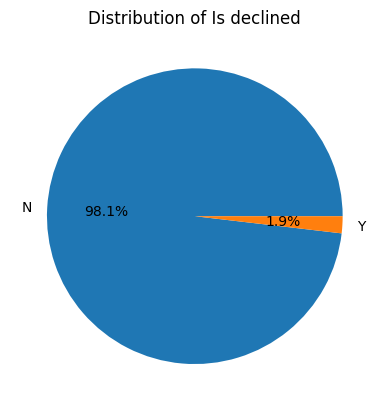

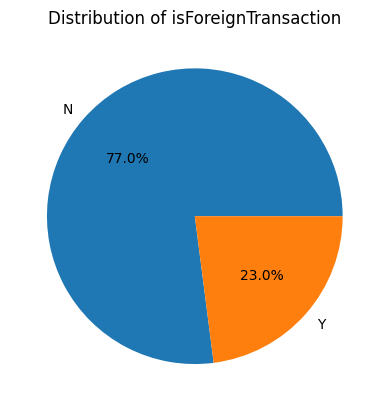

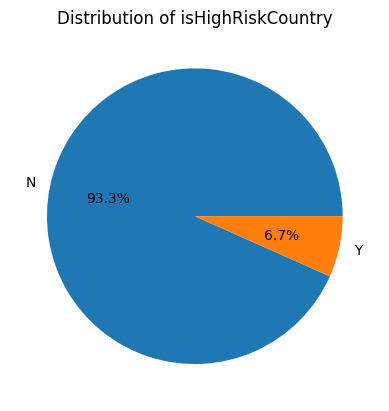

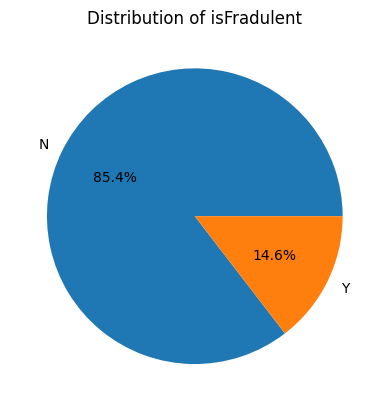

In [9]:
# visualize qualitative variables

for col in data.select_dtypes("object"):
    plt.figure()
    data[col].value_counts(normalize=True).plot.pie(labels=data[col].value_counts().index, autopct='%1.1f%%')
    plt.title(f"Distribution of {col}")
    plt.ylabel('') 

#### -Distribution of is declined
#####  >Declined transactions are relatively rare: Only 1.9% of transactions in the dataset were declined.
#####  >Approved transactions dominate: The vast majority (98.1%) of transactions were approved.
#####
#### -Distribution of isForeignTransaction
#####  >77.0% of the transactions were domestic (not foreign).
#####  >23.0% of the transactions were foreign.
#####
#### -Distribution of isHighRiskCountry
#####  >Most transactions originate from low-risk countries: 93.3% of transactions in the dataset are associated with countries not considered high-risk.
#####  >A smaller portion involve high-risk countries: 6.7% of transactions are linked to countries deemed high-risk.
#####
#### -Distribution of isFradulent
#####  >Fraudulent transactions are a minority: Only 14.6% of the transactions in the dataset are labeled as fraudulent.
#####  >Most transactions are legitimate: The vast majority (85.4%) of transactions are considered non-fraudulent.
....

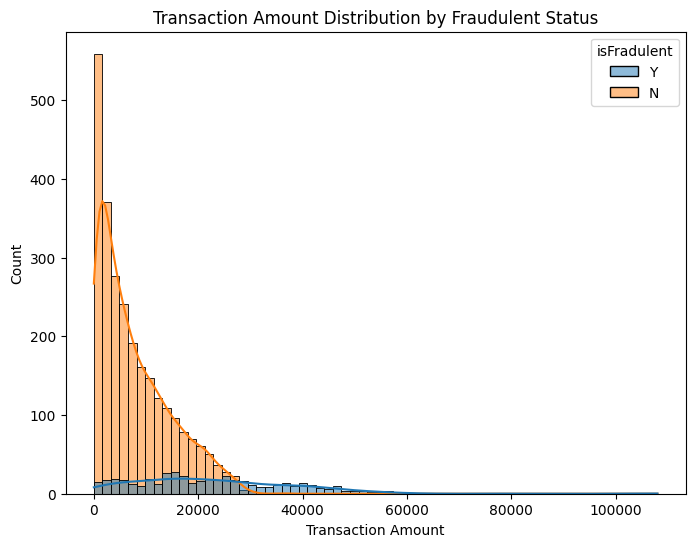

In [10]:
#Distribution of Transaction_amount for Fraudulent vs. Non-fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Transaction_amount', hue='isFradulent', kde=True)
plt.title('Transaction Amount Distribution by Fraudulent Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

##### >The distribution for non-fraudulent transactions (blue) appears to be relatively normal or bell-shaped, with a peak around 20,000 and gradually decreasing tails on either side.
##### >The distribution for fraudulent transactions (orange) is more skewed to the right, with a longer tail extending towards higher transaction amounts. This suggests that fraudulent transactions tend to involve larger amounts of money compared to non-fraudulent ones.
##### >While there is no clear separation between the two distributions, the tail of the orange distribution extends beyond the blue distribution, particularly around 50,000 and above. This suggests that transactions exceeding this amount might be more likely to be fraudulent.

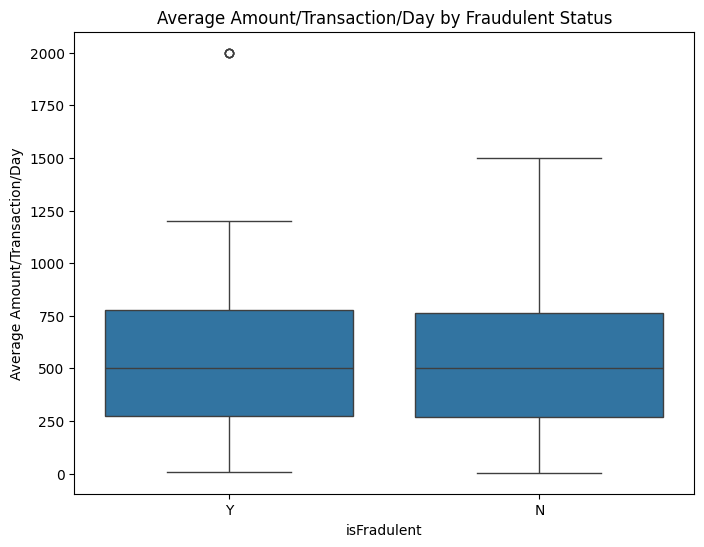

In [11]:
#Box Plots for Average Amount/transaction/day Across Different Levels of isFradulent
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='isFradulent', y='Average Amount/transaction/day')
plt.title('Average Amount/Transaction/Day by Fraudulent Status')
plt.xlabel('isFradulent')
plt.ylabel('Average Amount/Transaction/Day')
plt.show()

##### >Higher average transaction amounts per day could be a potential indicator of fraudulent activity.

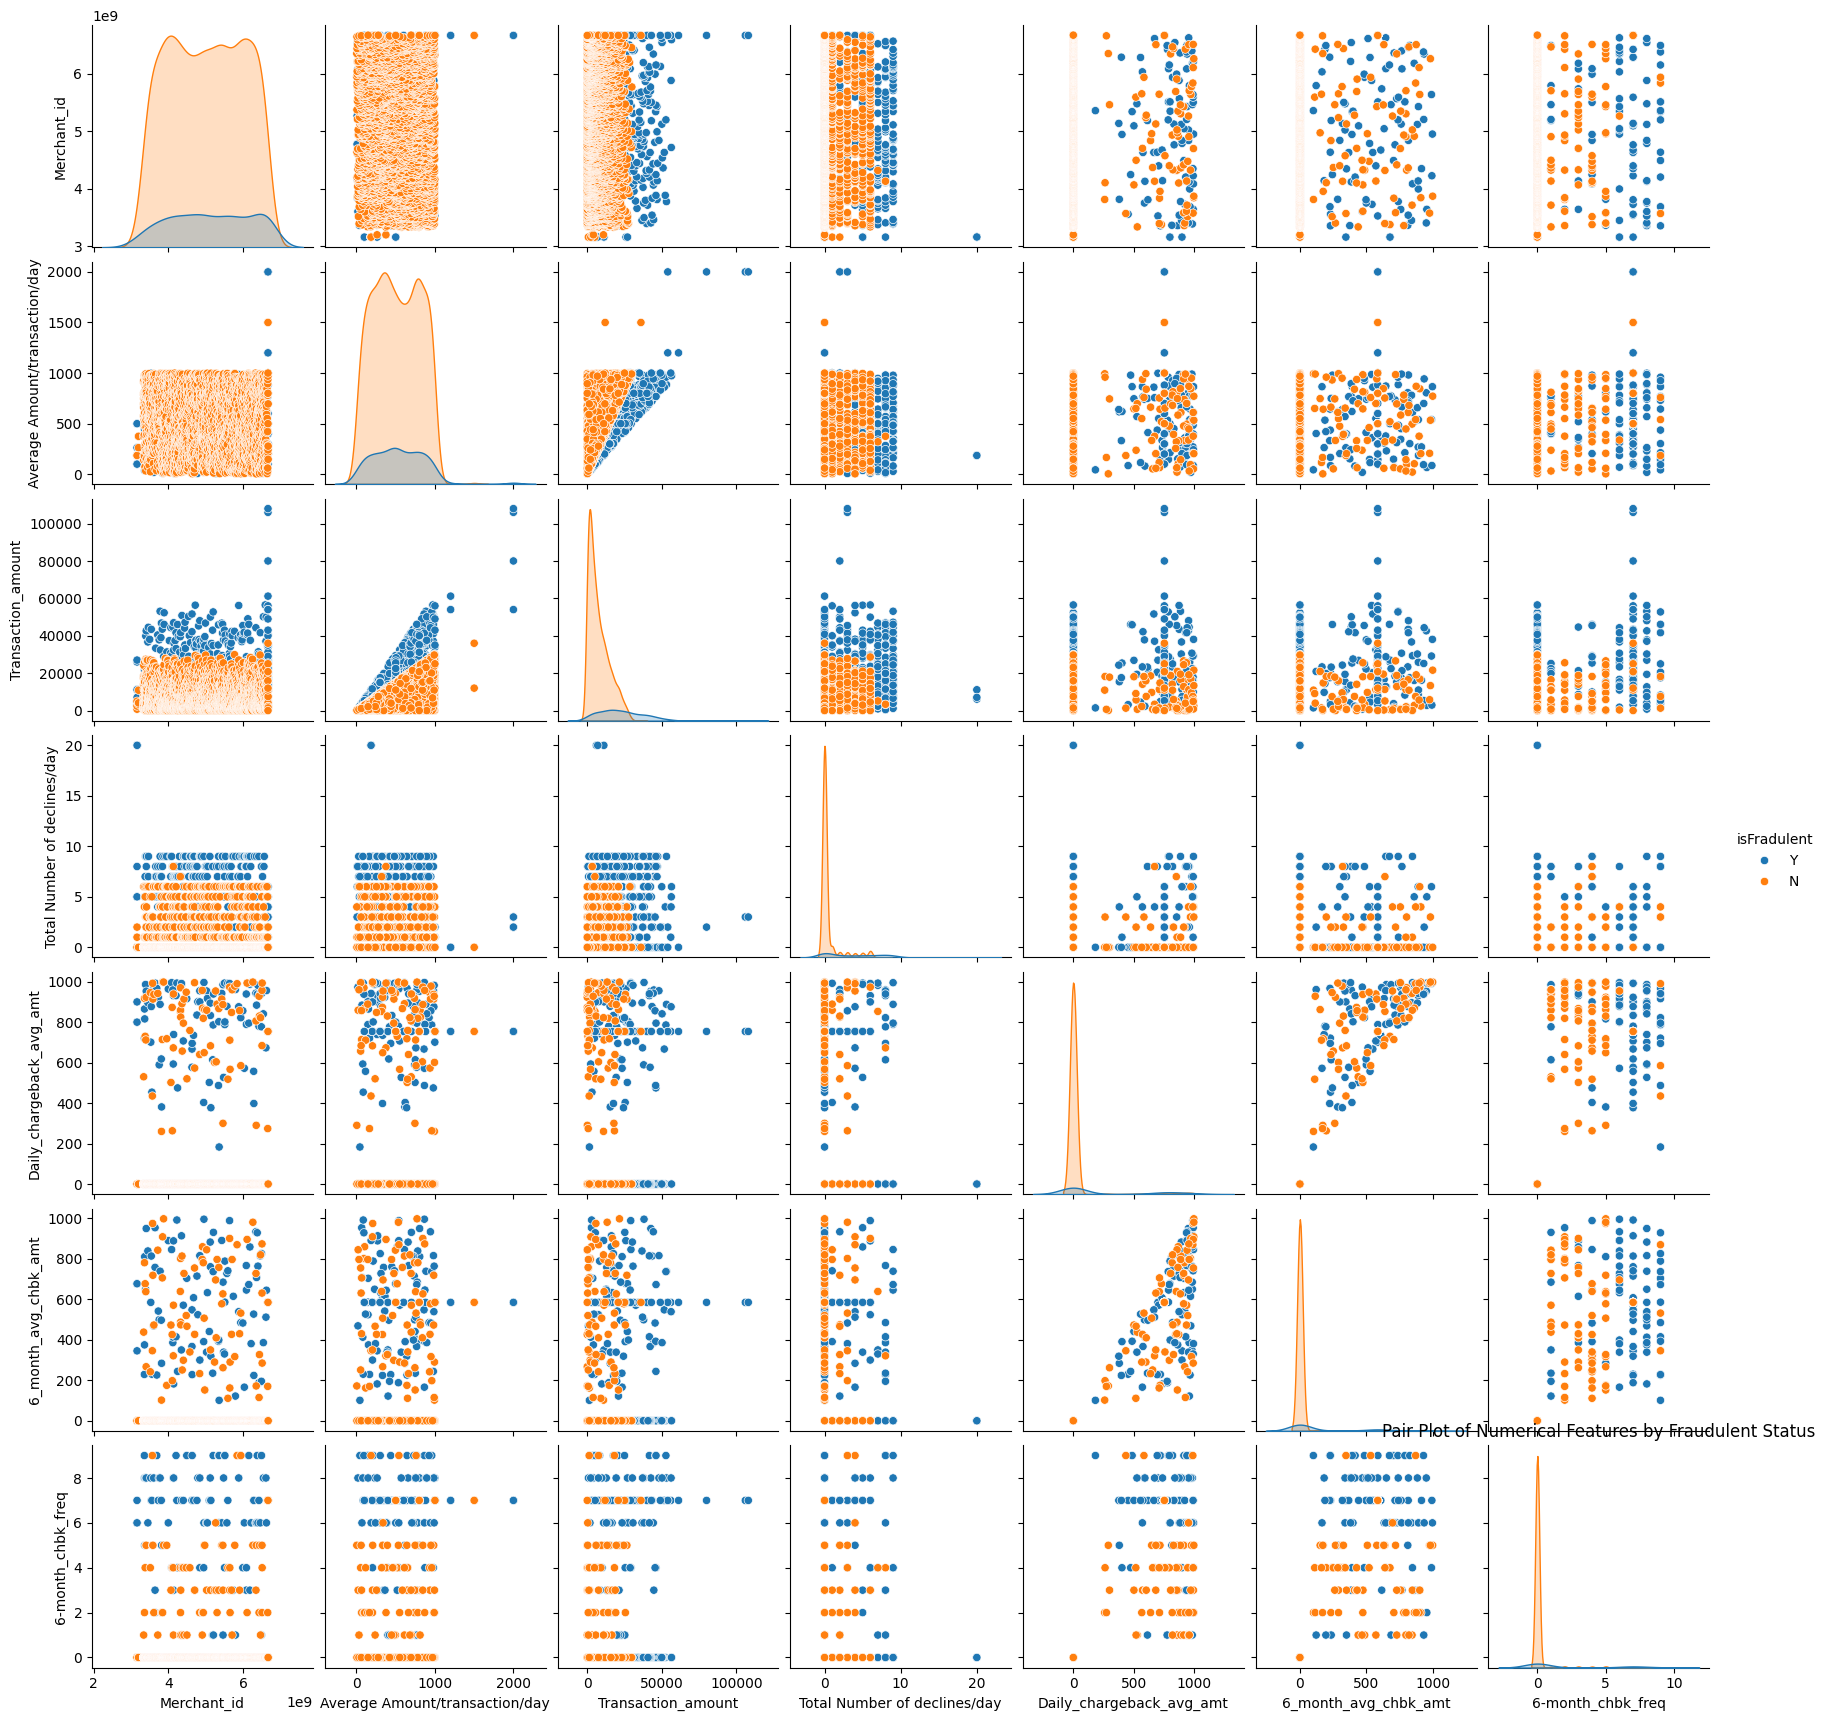

In [12]:
#Pair Plot of Numerical Features Colored by isFradulent
sns.pairplot(data=data, hue='isFradulent')
plt.title('Pair Plot of Numerical Features by Fraudulent Status')
plt.show()

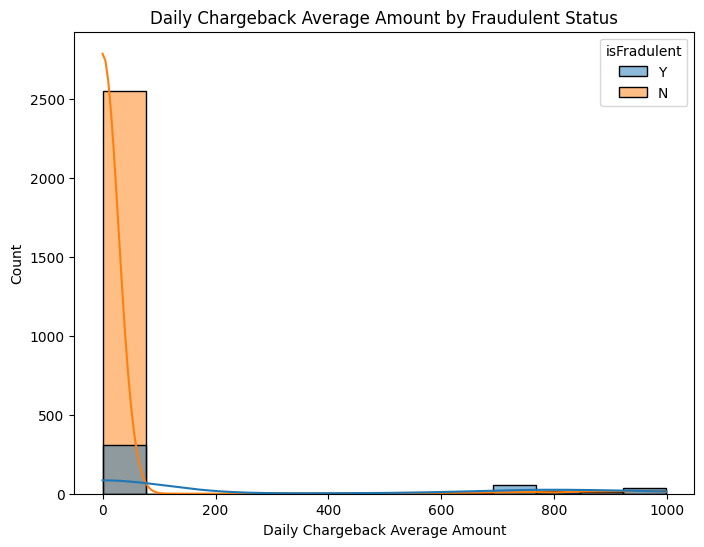

In [13]:
#Histograms of Daily_chargeback_avg_amt by isFradulent
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Daily_chargeback_avg_amt', hue='isFradulent', kde=True)
plt.title('Daily Chargeback Average Amount by Fraudulent Status')
plt.xlabel('Daily Chargeback Average Amount')
plt.ylabel('Count')
plt.show()

##### >Higher Averages for Fraudulent Accounts
##### >the orange distribution extends further to the right, suggesting a higher likelihood of fraud for accounts with daily chargeback averages above a certain threshold

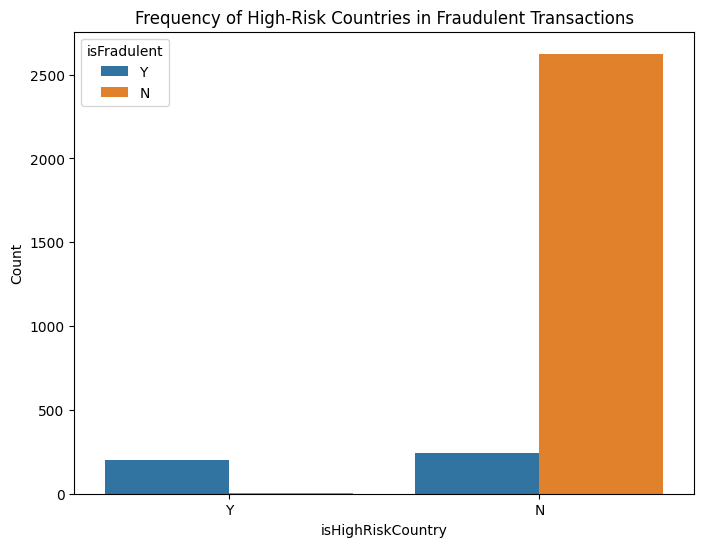

In [14]:
#Bar Plot Showing the Frequency of isHighRiskCountry in Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='isHighRiskCountry', hue='isFradulent')
plt.title('Frequency of High-Risk Countries in Fraudulent Transactions')
plt.xlabel('isHighRiskCountry')
plt.ylabel('Count')
plt.show()

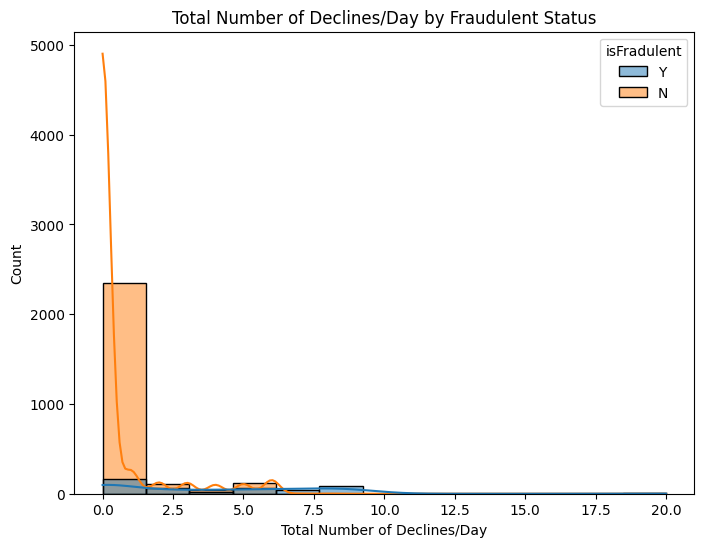

In [15]:
#Distribution of Total Number of declines/day for Different isFradulent
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Total Number of declines/day', hue='isFradulent', kde=True)
plt.title('Total Number of Declines/Day by Fraudulent Status')
plt.xlabel('Total Number of Declines/Day')
plt.ylabel('Count')
plt.show()

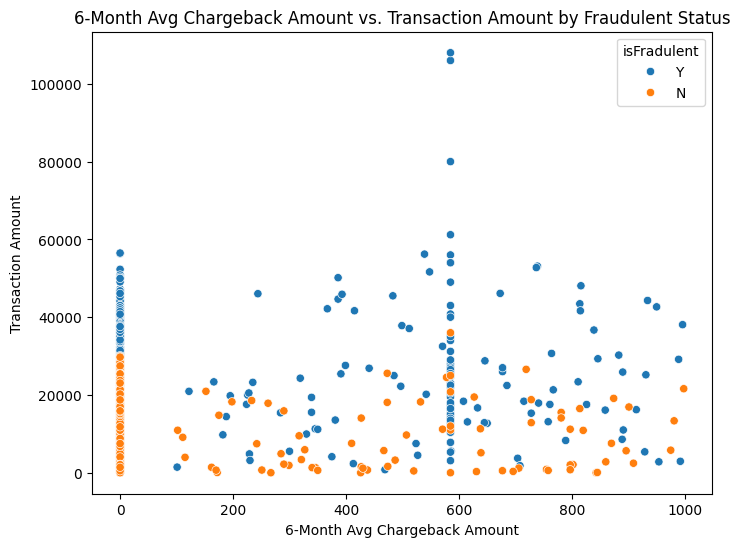

In [16]:
#Scatter Plot of 6_month_avg_chbk_amt vs Transaction_amount Colored by isFradulent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='6_month_avg_chbk_amt', y='Transaction_amount', hue='isFradulent')
plt.title('6-Month Avg Chargeback Amount vs. Transaction Amount by Fraudulent Status')
plt.xlabel('6-Month Avg Chargeback Amount')
plt.ylabel('Transaction Amount')
plt.show()

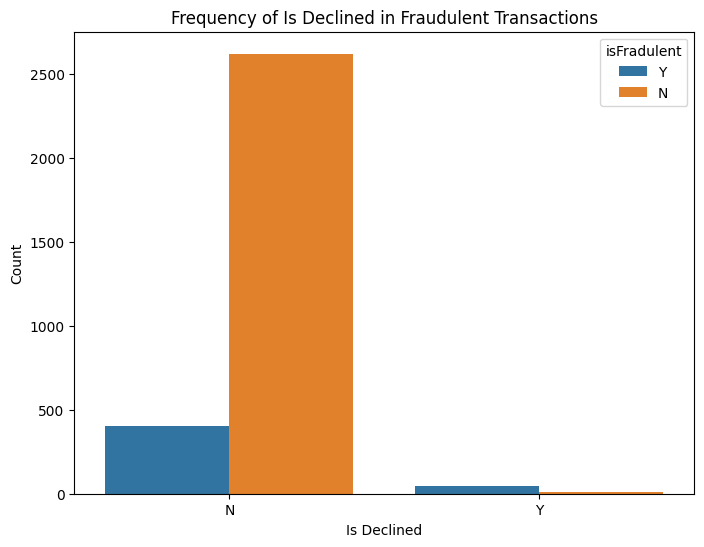

In [17]:
#Count Plot Showing the Frequency of Is declined in Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Is declined', hue='isFradulent')
plt.title('Frequency of Is Declined in Fraudulent Transactions')
plt.xlabel('Is Declined')
plt.ylabel('Count')
plt.show()

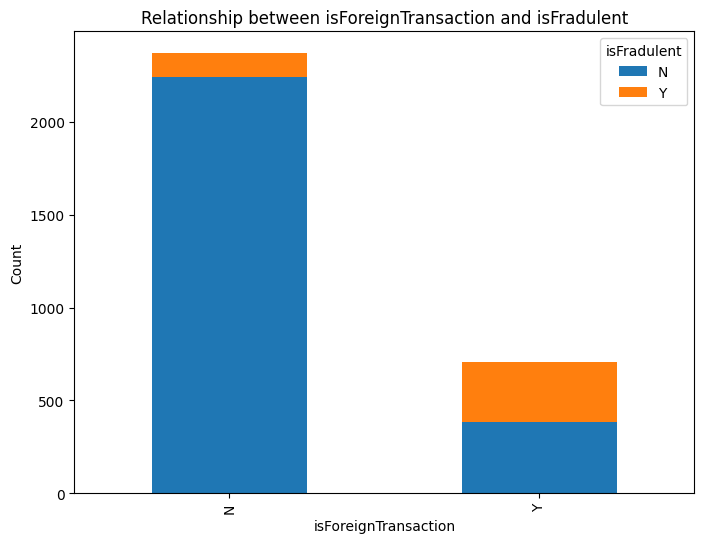

In [18]:
#Relationship Between isForeignTransaction and isFradulent Using a Stacked Bar Plot
cross_tab = pd.crosstab(data['isForeignTransaction'], data['isFradulent'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Relationship between isForeignTransaction and isFradulent')
plt.xlabel('isForeignTransaction')
plt.ylabel('Count')
plt.show()

In [19]:
data.describe()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


# DATA PREPROCESSING

In [20]:
#encoding for qualitative variables
code={
    "N":0,
    "Y":1
}

In [21]:
#handling categorical variables in the dataset by mapping their values to numeric representations.
for obj in data.select_dtypes("object"):
    data[obj]=data[obj].map(code)

<Axes: >

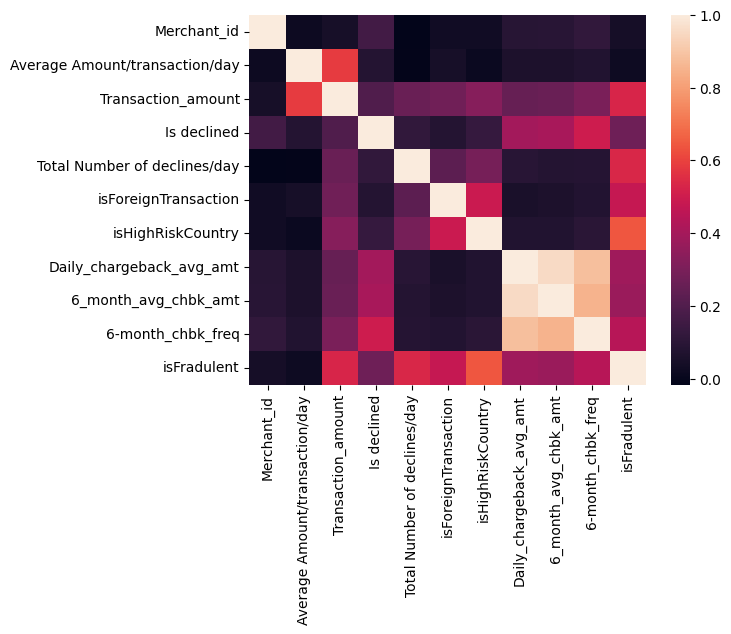

In [22]:
#view correlation
plt.figure()
sns.heatmap(data.corr())

In [23]:
#creating train/test sets
from sklearn.model_selection import train_test_split

In [24]:
trainset,testset=train_test_split(data,test_size=0.2,random_state=0)

In [25]:
# create X_train,y_train,X_test,y_test
def prepro(data):
    X=data.drop(["isFradulent"],axis=1)
    y=data["isFradulent"]
    return X,y

In [26]:
X_train,y_train=prepro(trainset)
X_test,y_test=prepro(testset)

# SCALING AND MODELING

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,Normalizer,PolynomialFeatures
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
# creating an evaluation function
def evalu(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print("confusion matrix",confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    N,train_score,val_score=learning_curve(model,X_train,y_train,scoring="f1",train_sizes=np.linspace(0.1,1,10),cv=5)
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),label="train_score")
    plt.plot(N,val_score.mean(axis=1),label="validation_score")
    plt.legend()

### SVM

In [29]:
svc=make_pipeline(StandardScaler(),SVC())

confusion matrix [[527   5]
 [  5  78]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.94      0.94      0.94        83

    accuracy                           0.98       615
   macro avg       0.97      0.97      0.97       615
weighted avg       0.98      0.98      0.98       615



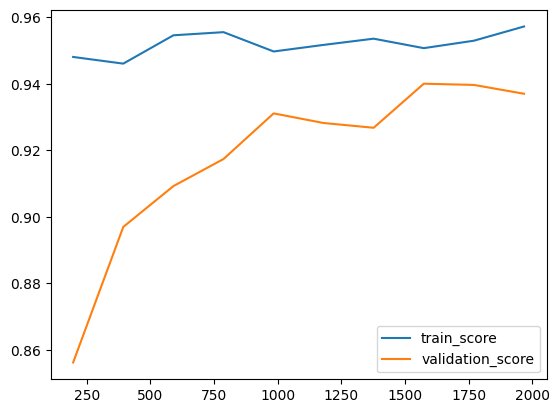

In [30]:
evalu(svc)

##### True Positives (TP) : 78
##### True Negatives (TN) : 527
##### False Positives (FP): 5 
##### False Negatives (FN): 5
#####
##### Precision: For class 1 (fraudulent transactions), it's 0.94, indicating 94% of transactions predicted as fraudulent were actually fraudulent.
##### Recall   : For class 1, it's 0.94, indicating that 94% of actual fraudulent transactions were correctly predicted.
##### F1-score : For class 1, it's 0.94, indicating high balance between precision and recall.
##### Accuracy : Overall, the model's accuracy is 98%. It correctly predicted 98% of the total instances in the dataset.
l.: 5

### KNN

In [31]:
knn=make_pipeline(StandardScaler(),KNeighborsClassifier())

confusion matrix [[526   6]
 [  7  76]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.93      0.92      0.92        83

    accuracy                           0.98       615
   macro avg       0.96      0.95      0.95       615
weighted avg       0.98      0.98      0.98       615



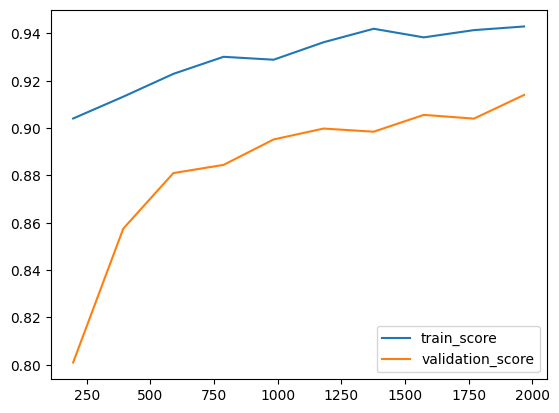

In [32]:
evalu(knn)

##### True Positives (TP) : 76
##### True Negatives (TN) : 526
##### False Positives (FP): 6
##### False Negatives (FN): 7
#####
##### Precision: For class 1 (fraudulent transactions), it's 0.93, indicating 93% of transactions predicted as fraudulent were actually fraudulent.
##### Recall   : For class 1, it's 0.92, indicating that 92% of actual fraudulent transactions were correctly predicted.
##### F1-score : For class 1, it's 0.92, indicating high balance between precision and recall.
##### Accuracy :Overall, the model's accuracy is 98%. It correctly predicted 98% of the total instances in the dataset.

### DECISION TREE

In [33]:
dt=make_pipeline(StandardScaler(),DecisionTreeClassifier())

confusion matrix [[524   8]
 [  5  78]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       532
           1       0.91      0.94      0.92        83

    accuracy                           0.98       615
   macro avg       0.95      0.96      0.96       615
weighted avg       0.98      0.98      0.98       615



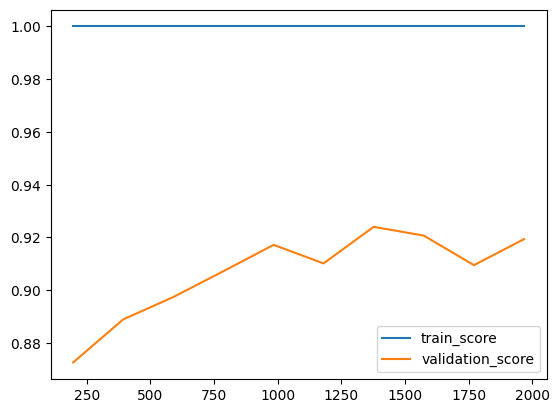

In [34]:
evalu(dt)

##### True Positives (TP): 79
##### True Negatives (TN): 524
##### False Positives (FP): 8
##### False Negatives (FN): 4
#####
##### Precision: For class 1 (fraudulent transactions), it's 0.91, indicating 91% of transactions predicted as fraudulent were actually fraudulent.
##### Recall (Sensitivity): For class 1, it's 0.95, indicating that 95% of actual fraudulent transactions were correctly predicted.
##### F1-score : For class 1, it's 0.93, indicating high balance between precision and recall.
##### Accuracy: Overall, the model's accuracy is 98%. It correctly predicted 98% of the total instances in the dataset.

### HYPERPARAMETER TUNING SVM

In [35]:
param = {"svc__C": [1.0, 2.0, 5.0, 40.0, 632.0], "svc__gamma": [1e-4, 1e-5]}
grid = GridSearchCV(svc, param, scoring="recall", cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1.0, 2.0, 5.0, 40.0, 632.0],
                         'svc__gamma': [0.0001, 1e-05]},
             scoring='recall')

confusion matrix [[529   3]
 [  4  79]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.96      0.95      0.96        83

    accuracy                           0.99       615
   macro avg       0.98      0.97      0.98       615
weighted avg       0.99      0.99      0.99       615



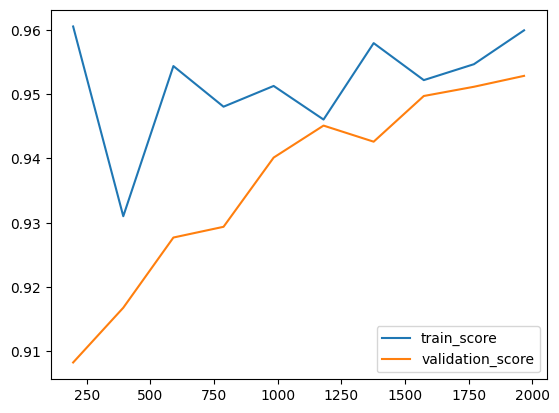

In [36]:
evalu(grid.best_estimator_)

##### True Positives (TP): 79 
##### True Negatives (TN): 529
##### False Positives (FP): 3
##### False Negatives (FN): 4 
#####
##### Precision: For class 1 (fraudulent transactions), it's 0.96, indicating 96% of transactions predicted as fraudulent were actually fraudulent.
##### Recall (Sensitivity): For class 1, it's 0.95, indicating that 95% of actual fraudulent transactions were correctly predicted.
##### F1-score : For class 1, it's 0.96, indicating high balance between precision and recall.
##### Accuracy: Overall, the model's accuracy is 99%. It correctly predicted 99% of the total instances in the dataset.

In [37]:
# Model final score
grid.best_estimator_.score(X_test, y_test)

0.9886178861788618

##### >The hyperparameter-tuned SVM model demonstrates high accuracy and strong performance in identifying fraudulent transactions.
##### >It has a high precision, recall, and F1-score, indicating robustness in both correctly identifying fraudulent cases and minimizing 
##### false predictions.
##### >The model's accuracy, precision, and recall are promising, suggesting that it effectively detects fraudulent transactions while 
##### minimizing misclassifications.